3387 documents
4 categories
n_samples: 3387, n_features: 24545
Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=4, n_init=1)
Cluster 0:
 god
 people
 com
 jesus
 don
 say
 believe
 think
 bible
 just
Cluster 1:
 graphics
 space
 image
 com
 nasa
 university
 posting
 program
 images
 file
Cluster 2:
 space
 henry
 toronto
 access
 nasa
 com
 digex
 pat
 alaska
 gov
Cluster 3:
 sgi
 livesey
 keith
 solntze
 wpd
 jon
 com
 caltech
 morality
 moral
First method:
Homogeneity: 0.584
Completeness: 0.627
V-measure: 0.605
Adjusted Rand-Index: 0.598
Silhouette Coefficient: 0.427 


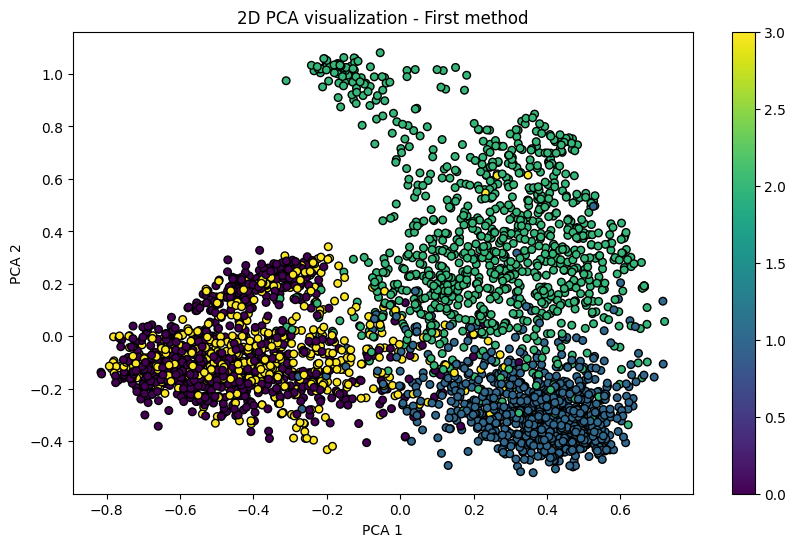

Second method:
Cluster 0:
 god
 people
 com
 jesus
 don
 say
 believe
 think
 bible
 just
Cluster 1:
 graphics
 space
 image
 com
 nasa
 university
 posting
 program
 images
 file
Cluster 2:
 space
 henry
 toronto
 access
 nasa
 com
 digex
 pat
 alaska
 gov
Homogeneity: 0.585
Completeness: 0.743
V-measure: 0.655
Adjusted Rand-Index: 0.626
Silhouette Coefficient: 0.401 


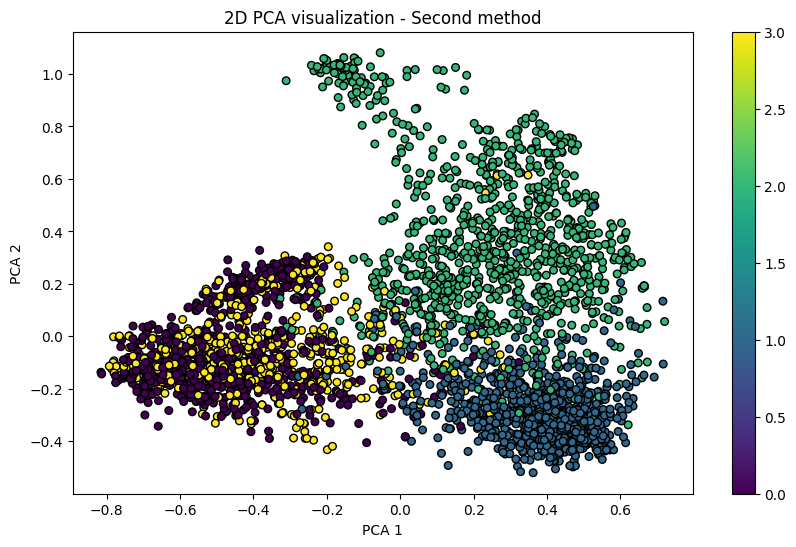

In [76]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
# warnings imports
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans

#import dataset
dataset = fetch_20newsgroups(subset='all', categories=categories,
shuffle=True, random_state=42)
#save labels
labels = dataset.target
#get the unique labels
true_k = np.unique(labels).shape[0]

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
data = dataset.data
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english',
use_idf=True)
X = vectorizer.fit_transform(data)
#The X object is now our input vector which contains the TF-IDF representation of our
#dataset. 
print("n_samples: %d, n_features: %d" % X.shape)

#Dimensionality Reduction
# Vectorizer results are normalized, which makes KMeans behave better
    # Since LSA/SVD results are not normalized, we have to redo the normalization.

    #If we do not normalize the data, variables with different scaling 
    # will be weighted differently in the distance formula 
    # that is being optimized during training.
	

n_components = 5 #Sets the number of latent dimensions (topics) to which the data is reduced. 
                  #This controls how much the dimensionality of the dataset is reduced.
#Performs truncated singular value decomposition (SVD) on the input matrix 
#X to reduce its dimensionality.
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
#Combines the SVD and normalization steps into a single pipeline for streamlined processing. 
lsa = make_pipeline(svd, normalizer)
#The final X is the input which we will be using. 
# It has been cleaned, TF-IDF transformed, and its dimensions reduced.
X = lsa.fit_transform(X)

#scikit-learn offers two implementations of kmeans:
# either in mini-batches or without
minibatch = True
if minibatch:
   km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
   init_size=1000, batch_size=1000)
else:
   km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
km.fit(X)
# top words per cluster
print("Clustering sparse data with %s" % km)

original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
   print("Cluster %d:" % i)
   for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind])
print("First method:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.colorbar()
plt.title('2D PCA visualization - First method')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


#Note: You might see different results, as machine learning 
# algorithms do not produce the exact same results each time.
#km.predict(X_test) to test our model

#imports the KMeans algorithm from the scikit-learn library and 
# creates an instance of it with three clusters, a random state of 0, 
# and automatic initialization
#KMeans algorithm is a clustering algorithm that groups 
# similar data points together based on their distance from each other

#random runs: This affects how the initial cluster centroids are chosen 
#and ensures consistent results across multiple runs.
#n_init=auto: Automatically runs 10 initializations and picks the best one based on inertia (objective function).
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
#The fit method is then called on the normalized training data 
# to train the KMeans model on the data.
kmeans.fit(X)
print("Second method:")
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(kmeans.n_clusters):  # Change true_k to kmeans.n_clusters
   print("Cluster %d:" % i)
   for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind])
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, kmeans.labels_, sample_size=1000))

# PCA for visualization
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.colorbar()
plt.title('2D PCA visualization - Second method')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Application Naïve Bayes

In [77]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import classification_report

# Load dataset
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
data = dataset.data
labels = dataset.target

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(data)

# Naïve Bayes Classifier
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Get top words for each class (based on feature_log_prob_)
print("\nTop words per class:")
terms = vectorizer.get_feature_names_out()

# For each class, print the top 10 words
for i, class_label in enumerate(dataset.target_names):
    top10_words = np.argsort(nb.feature_log_prob_[i])[-10:]  # Get the indices of top 10 words
    print(f"\nClass {class_label}:")
    for index in top10_words[::-1]:  # Sort in reverse to get highest probabilities first
        print(f"  {terms[index]}")

# Classification evaluation
y_pred = nb.predict(X_test)
print("\nNaïve Bayes Classification Evaluation:")
print(classification_report(y_test, y_pred, target_names=dataset.target_names))



Top words per class:

Class alt.atheism:
  god
  keith
  com
  people
  atheists
  sgi
  livesey
  caltech
  atheism
  article

Class comp.graphics:
  graphics
  image
  university
  thanks
  file
  files
  com
  computer
  3d
  bit

Class sci.space:
  space
  nasa
  henry
  access
  toronto
  com
  digex
  gov
  pat
  moon

Class talk.religion.misc:
  god
  com
  sandvik
  jesus
  people
  christian
  brian
  kent
  koresh
  article

Naïve Bayes Classification Evaluation:
                    precision    recall  f1-score   support

       alt.atheism       0.84      0.98      0.90       224
     comp.graphics       0.95      0.99      0.97       297
         sci.space       0.96      0.98      0.97       307
talk.religion.misc       0.99      0.69      0.81       189

          accuracy                           0.93      1017
         macro avg       0.93      0.91      0.91      1017
      weighted avg       0.94      0.93      0.93      1017



Compare Bag-of-Words vs. TF-IDF for K-means

In [81]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
data = dataset.data
labels = dataset.target

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

vectorizer_bow = CountVectorizer(stop_words='english', max_df=0.5, min_df=2)
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)


n_components = 100  
svd = TruncatedSVD(n_components=n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Transform the TF-IDF data
X_train_tfidf_lsa = lsa.fit_transform(X_train_tfidf)
X_test_tfidf_lsa = lsa.transform(X_test_tfidf)

# Transform the Bag of Words data
X_train_bow_lsa = lsa.fit_transform(X_train_bow)
X_test_bow_lsa = lsa.transform(X_test_bow)

# KMeans clustering for TF-IDF
kmeans_tfidf = KMeans(n_clusters=4, random_state=42)
kmeans_tfidf.fit(X_train_tfidf_lsa)
y_pred_tfidf = kmeans_tfidf.predict(X_test_tfidf_lsa)

# KMeans clustering for Bag of Words
kmeans_bow = KMeans(n_clusters=4, random_state=42)
kmeans_bow.fit(X_train_bow_lsa)
y_pred_bow = kmeans_bow.predict(X_test_bow_lsa)


print("Clustering Evaluation for TF-IDF:")
homogeneity_tfidf = homogeneity_score(y_test, y_pred_tfidf)
completeness_tfidf = completeness_score(y_test, y_pred_tfidf)
v_measure_tfidf = v_measure_score(y_test, y_pred_tfidf)
adjusted_rand_tfidf = adjusted_rand_score(y_test, y_pred_tfidf)
silhouette_tfidf = silhouette_score(X_test_tfidf_lsa, y_pred_tfidf)
print(f"Homogeneity: {homogeneity_tfidf:.4f}")
print(f"Completeness: {completeness_tfidf:.4f}")
print(f"V-Measure: {v_measure_tfidf:.4f}")
print(f"Adjusted Rand-Index: {adjusted_rand_tfidf:.4f}")
print(f"Silhouette Coefficient: {silhouette_tfidf:.4f}")
print("\nClustering Evaluation for Bag of Words:")

homogeneity_bow = homogeneity_score(y_test, y_pred_bow)
completeness_bow = completeness_score(y_test, y_pred_bow)
v_measure_bow = v_measure_score(y_test, y_pred_bow)
adjusted_rand_bow = adjusted_rand_score(y_test, y_pred_bow)
silhouette_bow = silhouette_score(X_test_bow_lsa, y_pred_bow)
print(f"Homogeneity: {homogeneity_bow:.4f}")
print(f"Completeness: {completeness_bow:.4f}")
print(f"V-Measure: {v_measure_bow:.4f}")
print(f"Adjusted Rand-Index: {adjusted_rand_bow:.4f}")
print(f"Silhouette Coefficient: {silhouette_bow:.4f}")


Clustering Evaluation for TF-IDF:
Homogeneity: 0.6039
Completeness: 0.6713
V-Measure: 0.6358
Adjusted Rand-Index: 0.5672
Silhouette Coefficient: 0.0584

Clustering Evaluation for Bag of Words:
Homogeneity: 0.2318
Completeness: 0.2316
V-Measure: 0.2317
Adjusted Rand-Index: 0.1954
Silhouette Coefficient: 0.0698


Comparsion Bag-of-Words vs. TF-IDF for Naive Bayes

Classification Report for Bag of Words:
                    precision    recall  f1-score   support

       alt.atheism       0.89      0.96      0.92       224
     comp.graphics       0.97      0.99      0.98       297
         sci.space       0.98      0.96      0.97       307
talk.religion.misc       0.94      0.85      0.89       189

          accuracy                           0.95      1017
         macro avg       0.95      0.94      0.94      1017
      weighted avg       0.95      0.95      0.95      1017


Classification Report for TF-IDF:
                    precision    recall  f1-score   support

       alt.atheism       0.84      0.98      0.91       224
     comp.graphics       0.95      0.99      0.97       297
         sci.space       0.96      0.98      0.97       307
talk.religion.misc       0.99      0.69      0.82       189

          accuracy                           0.93      1017
         macro avg       0.94      0.91      0.92      1017
      weighted avg  

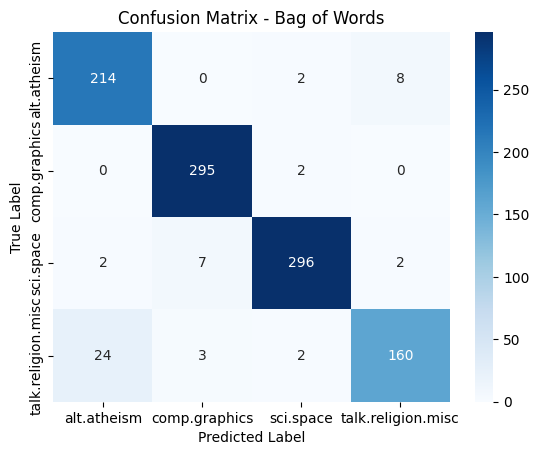


Confusion Matrix for TF-IDF:


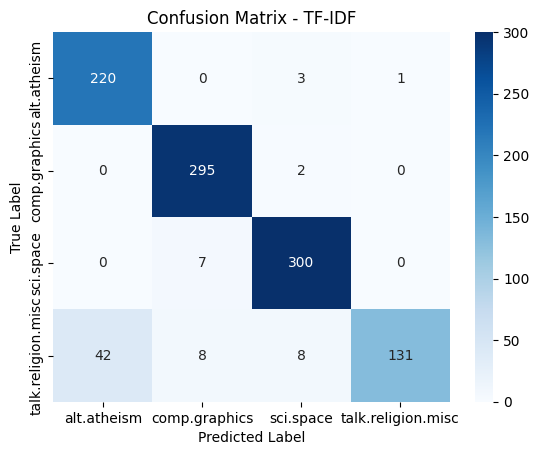

F1-score for Bag of Words: 0.9489
Precision for Bag of Words: 0.9496
Recall for Bag of Words: 0.9489
F1-score for TF-IDF: 0.9302
Precision for TF-IDF: 0.9366
Recall for TF-IDF: 0.9302


In [82]:
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
data = dataset.data
labels = dataset.target

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

vectorizer_bow = CountVectorizer(stop_words='english', max_df=0.5, min_df=2)
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_bow = nb_bow.predict(X_test_bow)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("Classification Report for Bag of Words:")
report_bow = classification_report(y_test, y_pred_bow, target_names=dataset.target_names, output_dict=True)
print(classification_report(y_test, y_pred_bow, target_names=dataset.target_names))

print("\nClassification Report for TF-IDF:")
report_tfidf = classification_report(y_test, y_pred_tfidf, target_names=dataset.target_names, output_dict=True)
print(classification_report(y_test, y_pred_tfidf, target_names=dataset.target_names))

accuracy_bow = accuracy_score(y_test, y_pred_bow)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy for Bag of Words: {accuracy_bow:.4f}")
print(f"Accuracy for TF-IDF: {accuracy_tfidf:.4f}")

print("\nConfusion Matrix for Bag of Words:")
conf_matrix_bow = confusion_matrix(y_test, y_pred_bow)
sns.heatmap(conf_matrix_bow, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.title("Confusion Matrix - Bag of Words")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix for TF-IDF:")
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(conf_matrix_tfidf, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.title("Confusion Matrix - TF-IDF")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

f1_bow = report_bow['accuracy']
precision_bow = report_bow['weighted avg']['precision']
recall_bow = report_bow['weighted avg']['recall']
print(f"F1-score for Bag of Words: {f1_bow:.4f}")
print(f"Precision for Bag of Words: {precision_bow:.4f}")
print(f"Recall for Bag of Words: {recall_bow:.4f}")

f1_tfidf = report_tfidf['accuracy']
precision_tfidf = report_tfidf['weighted avg']['precision']
recall_tfidf = report_tfidf['weighted avg']['recall']
print(f"F1-score for TF-IDF: {f1_tfidf:.4f}")
print(f"Precision for TF-IDF: {precision_tfidf:.4f}")
print(f"Recall for TF-IDF: {recall_tfidf:.4f}")


Test the Best-Performing Model (Naive bayes bags of words) on Unseen Text

In [83]:
# New unseen text inputs for testing the model
new_texts = [
    "The spaceship launched successfully into orbit.",
    "The religious debate about the existence of God continues.",
    "New computer graphics software has been released.",
    "NASA's latest space mission has gathered a lot of attention."
]

# Transform the new texts using the same vectorizer used for training
new_texts_bow = vectorizer_bow.transform(new_texts)

# Predict the categories for the new texts
predicted_categories_bow = nb_bow.predict(new_texts_bow)

# Print the predictions along with the corresponding category names
print("\nPredictions for New Texts (Bag of Words):")
for text, predicted_category in zip(new_texts, predicted_categories_bow):
    print(f"Text: {text}\nPredicted Category: {dataset.target_names[predicted_category]}\n")



Predictions for New Texts (Bag of Words):
Text: The spaceship launched successfully into orbit.
Predicted Category: sci.space

Text: The religious debate about the existence of God continues.
Predicted Category: alt.atheism

Text: New computer graphics software has been released.
Predicted Category: comp.graphics

Text: NASA's latest space mission has gathered a lot of attention.
Predicted Category: sci.space

